<a href="https://colab.research.google.com/github/iamakshay0228/Unsupervised-ML/blob/main/Netflix_movie_reccommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project** **Name**- Netflix Movies and TV Shows Clustering

##**Contribution**-Individual

## **Submitted by**- Akshay  Ingle

##**GitHub Link**- https://github.com/iamakshay0228/Unsupervised-ML.git

# Project Discription

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

# Problem Statement

The main objective of this project is to make an unsupervised machine learning model that will cluster similar content by matching text-based features.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
url='https://drive.google.com/file/d/1xJGllnE12mAggLuRo8b0oNSshUlG8GvF/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,text_features
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",0.692007,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,tv show 3 joão miguel bianca comparato michel ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",0.235584,TV-MA,NaN,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,movi 719 jorg michel grau demián bichir héctor...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",-0.334945,R,NaN,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",movi 2359 gilbert chan tedd chan stella chung ...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",-0.563157,PG-13,NaN,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",movi 9 shane acker elijah wood john c reilli j...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",-0.677263,PG-13,NaN,Dramas,A brilliant group of students become card-coun...,movi 21 robert luket jim sturgess kevin spacey...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Exploratory Data Analysis

In [ ]:
# Total no of movies and tv shows releasesd
df['type'].value_counts()

,count
type,
Movie,4673
TV Show,135


Text(0.5, 1.0, 'no of movie/shows released year wise')

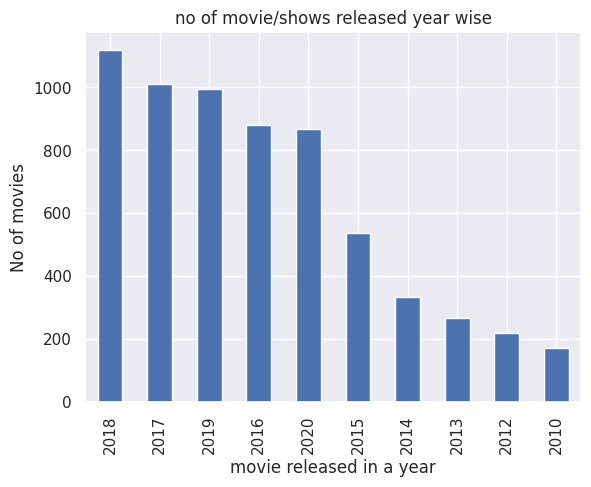

In [ ]:
#Which year has maximum no of movies or shows released
x=df['release_year'].value_counts().nlargest(10,keep='all')
x.plot(kind='bar')
plt.xlabel('movie released in a year')
plt.ylabel('No of movies')
plt.title('no of movie/shows released year wise')

Text(0.5, 1.0, 'countries where netflix is most popular')

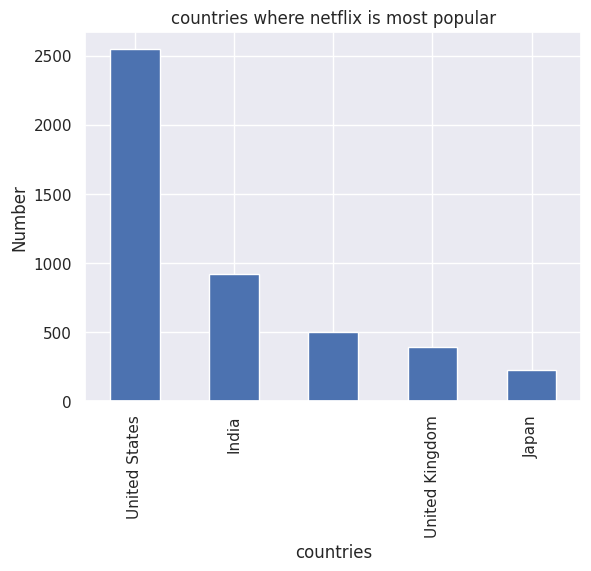

In [ ]:
# Top countries where netflix is most popular
Top_countries= df['country'].value_counts().nlargest(5,keep='all')
Top_countries.plot(kind='bar')
plt.xlabel('countries')
plt.ylabel('Number')
plt.title('countries where netflix is most popular')

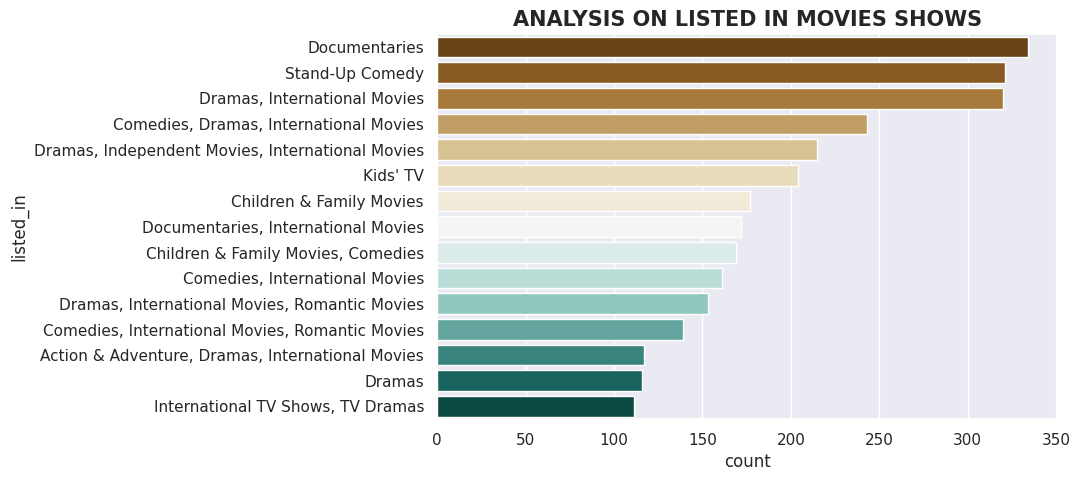

In [ ]:
#Most Popular movie generes
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=df, palette="BrBG", order=df['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED IN MOVIES SHOWS', fontsize=15, fontweight='bold')
plt.show()



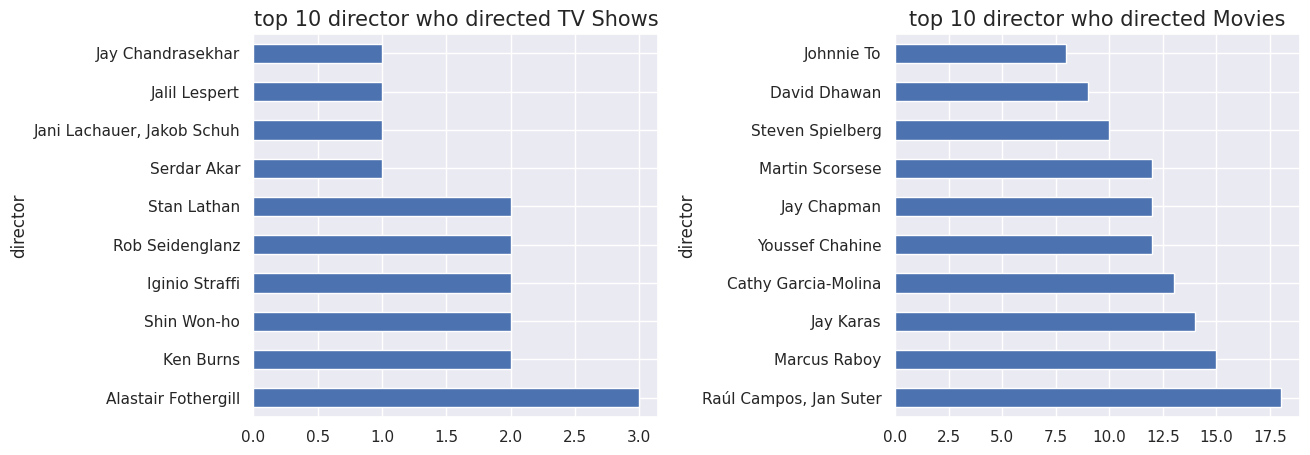

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


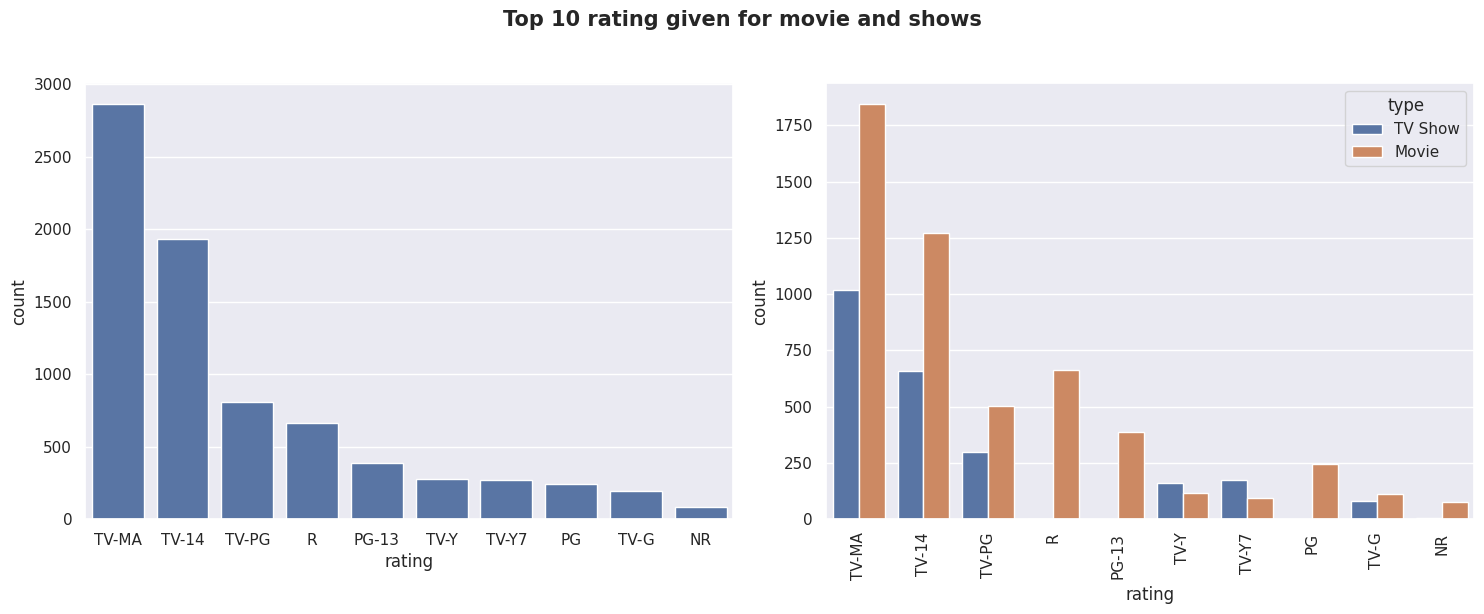

In [ ]:
# Rating wise movie or show distribution
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number')

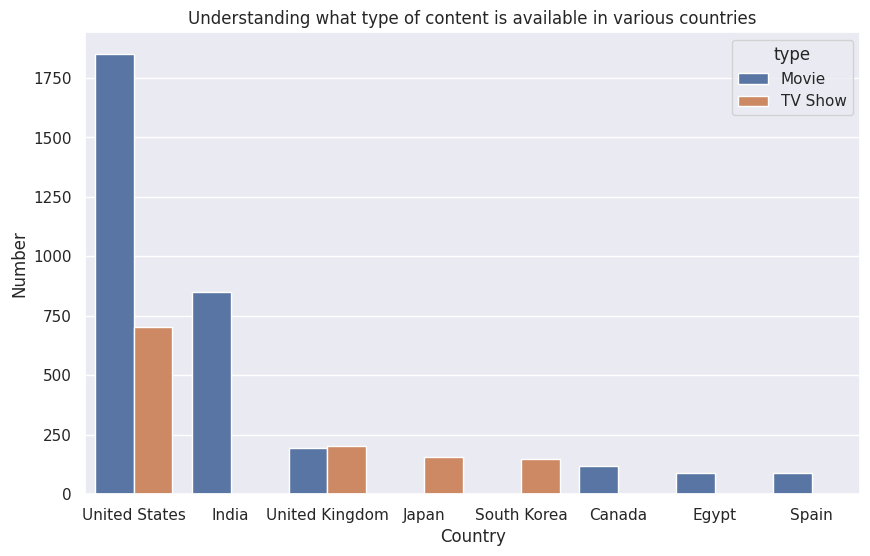

In [ ]:
# Understanding what type of content is available in various countries
x=df.groupby('country')['type'].value_counts().nlargest(10,keep='all')
plt.figure(figsize=(10,6))
sns.barplot(x=x.index.get_level_values(0),y=x.values,hue=x.index.get_level_values(1))
plt.title('Understanding what type of content is available in various countries')
plt.xlabel('Country')
plt.ylabel('Number')

<Axes: xlabel='country'>

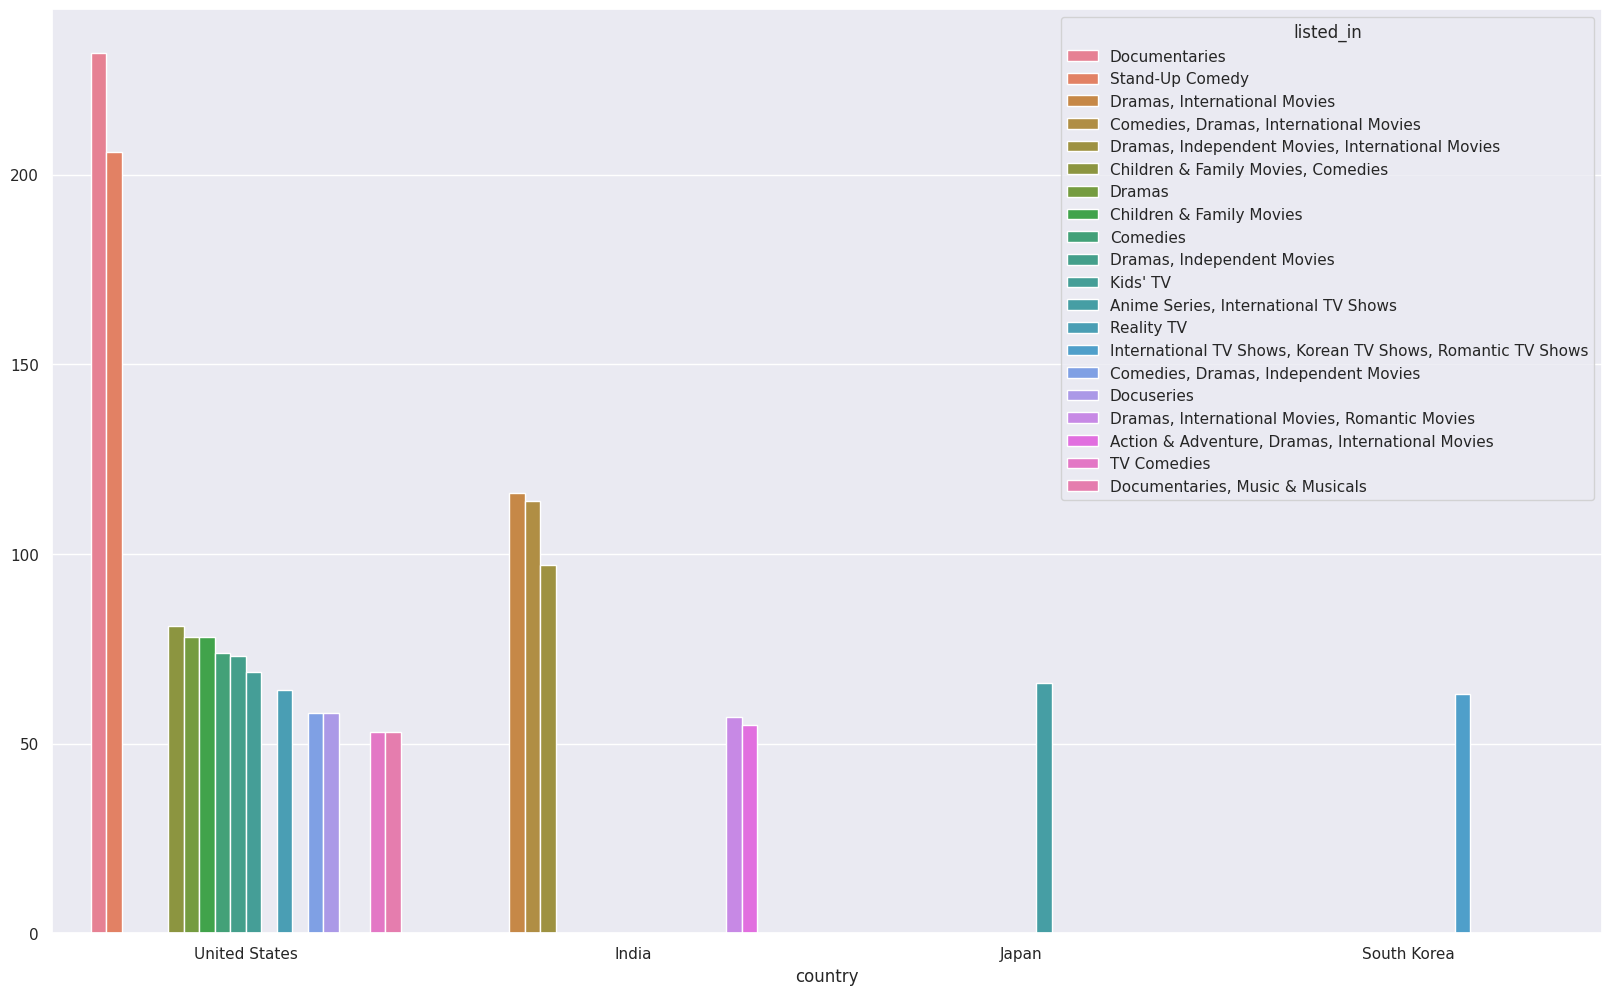

In [ ]:
# Genere Wise movie distribution across countries
x=df.groupby('country')['listed_in'].value_counts().nlargest(20,keep='all')
plt.figure(figsize=(20,12))
sns.barplot(x=x.index.get_level_values(0),y=x.values,hue=x.index.get_level_values(1))




<Axes: xlabel='rating'>

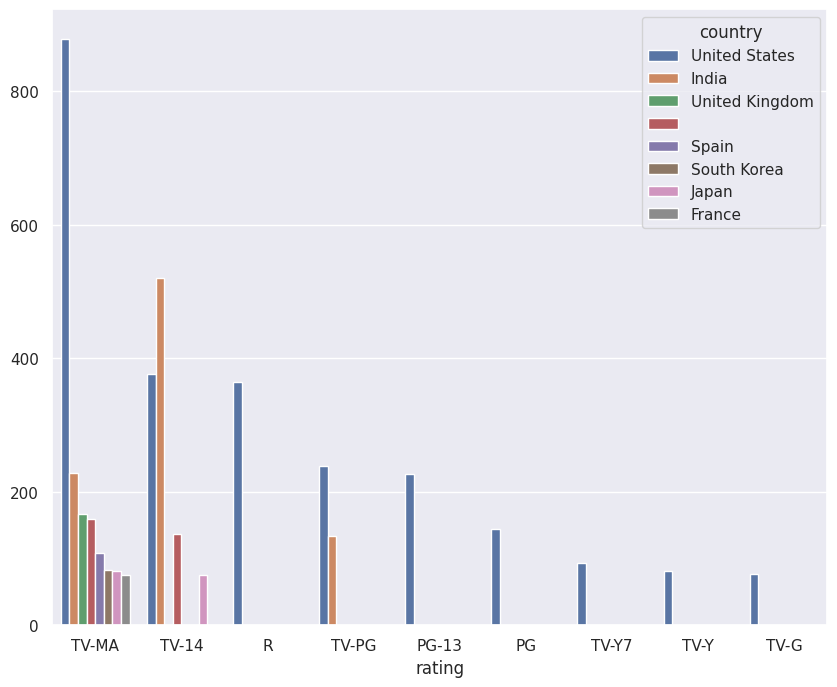

In [ ]:
# Rating wise distribution across countiries
x=df.groupby('rating')['country'].value_counts().nlargest(20,keep='all')
plt.figure(figsize=(10,8))
sns.barplot(x=x.index.get_level_values(0),y=x.values,hue=x.index.get_level_values(1))

##Data Preprocessing

# Data cleaning
Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

In [ ]:
# Duplicate Values
df.duplicated().sum()

0

In [ ]:
# Missing or null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)



In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
#Create a function to preprocess the ‘duration’ column, converting it into a numerical format.
def preprocess_duration(duration):
  def preprocess_duration(duration):
    if isinstance(duration, str):  # Check if duration is a string
        if 'min' in duration:
            return int(duration.split(' ')[0])
        elif 'Season' in duration:
            return int(duration.split(' ')[0]) * 60  # Assume each season is equivalent to 60 minutes
    return duration  # Return the original value if it's not a string

df['duration'] = df['duration'].apply(preprocess_duration)

In [ ]:
#Normalize the ‘release_year’ and ‘duration’ columns using StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['release_year', 'duration']] = scaler.fit_transform(df[['release_year', 'duration']])

In [ ]:
#Create a new column ‘text_features’ by combining relevant text columns to be used for text vectorization.
df['text_features'] = df['type'] + ' ' + df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['listed_in'] + ' ' + df['description']

## Removing STOP words and lower casing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df['text_features'] = df['text_features'].apply(stopwords)
# checking the first row after the process
df['text_features'][0]

'tv show 3% joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil tv-ma international tv shows, tv dramas, tv sci-fi & fantasy future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
df['text_features'] = df['text_features'].apply(remove_punctuation)
# checking the first row after the process
df['text_features'][0]

'tv show 3 joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

##Stemming
Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks and text analysis. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms. For example, stemming would reduce "running," "runner," and "ran" to the base form "run." This can be useful in tasks such as information retrieval or text classification where the specific form of a word is not important, and it can also help in reducing the size of the vocabulary. There are several stemmers available in python such as Porter stemmer, Snowball stemmer and Lancaster stemmer.

We will utilize SnowballStemmer to construct a meaningful word from a word corpus.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)



In [ ]:
# appying stemming function
df['text_features'] = df['text_features'].apply(stemming)

# checking the first row after the process
df['text_features'][0]

'tv show 3 joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil tvma intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
## create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_features'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()


In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text_features']).toarray()
#Convert to DataFrame for easy manipulation
tfidf_df = pd.DataFrame(vector, index=df.index, columns=tfidf.get_feature_names_out())

In [ ]:
#Combine normalized numerical features and TF-IDF features into a final DataFrame for clustering
final_df = pd.concat([df[['release_year', 'duration']], tfidf_df], axis=1)
final_df.fillna(0, inplace=True)
#Convert the column names of numerical features to strings
final_df.columns = final_df.columns.astype(str)  # Convert all column names to strings


##Dimensionality Reduction
Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

There are several techniques used for dimensionality reduction, such as:

Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.

We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_df = pca.fit_transform(final_df)



#Model Implementation
 ## K-Means Clustering


K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into a pre-defined number of clusters. The goal is to group similar data points together and discover underlying patterns or structures within the data.

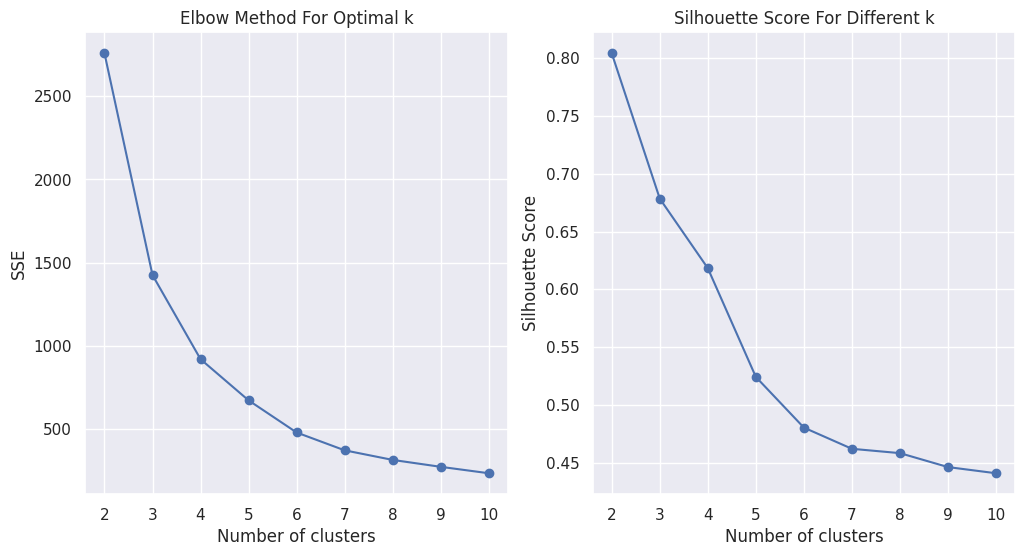

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Use the elbow method to find the optimal number of clusters for K-Means clustering.
sse = []
sil_scores = []
for k in range(2, 11):  # Start from 2 as 1 is not a valid number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot the Elbow graph and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score For Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The first graph on the left, titled “Elbow Method For Optimal k,” plots the Sum of Squared Errors (SSE) against the number of clusters, k, ranging from 2 to 10. SSE measures the total squared distance between each data point and the centroid of its assigned cluster. As the number of clusters increases, the SSE naturally decreases because more clusters mean that data points are generally closer to their respective centroids. The purpose of the elbow method is to identify a point where the rate of SSE reduction slows significantly.

The second graph on the right, titled “Silhouette Score For Different k,” shows the silhouette score plotted against the number of clusters, k, also ranging from 2 to 10. The silhouette score measures how similar a data point is to its own cluster compared to other clusters, with a score ranging from -1 to 1. A higher silhouette score indicates well-defined, distinct clusters. In this graph, the highest silhouette score is observed at k=2 , but there is a notable drop as k increases. However, the scores for k=4 and k=5 are still relatively high compared to higher values of k, indicating that these cluster counts might also provide a good balance between cluster quantity and quality.



In [ ]:
k = 5  # Update this value based on the optimal k from the Elbow Method and Silhouette Score
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

# Add the cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(df.head())

# Calculate the silhouette score
score = silhouette_score(pca_df, kmeans.labels_)
print(f'Silhouette Score: {score}')

  show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating  duration  \
0    August 14, 2020      0.692007  TV-MA       NaN   
1  December 23, 2016      0.235584  TV-MA       NaN   
2  December 20, 2018     -0.334945      R       NaN   
3  November 16, 2017     -0.563157  PG-13       NaN   
4    Janu

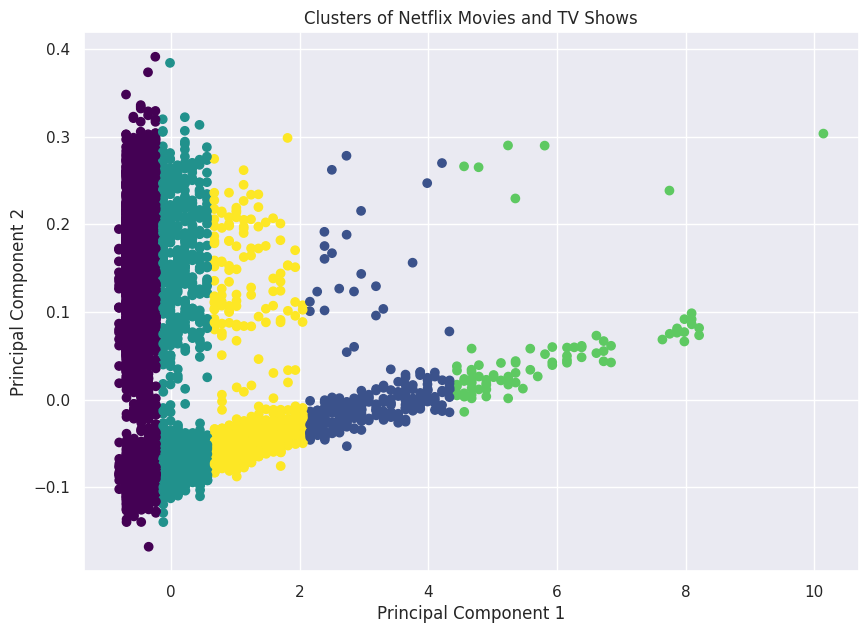

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_df = pca.fit_transform(final_df)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o')
plt.title('Clusters of Netflix Movies and TV Shows')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Hierarchical clustering
Hierarchical clustering is a method of clustering data points into a tree-like structure. It is an alternative method to k-means clustering and it is used to group similar data points together in a hierarchical fashion.

There are two main types of Hierarchical clustering: Agglomerative and Divisive. Agglomerative is a bottom-up approach where each data point is considered as a separate cluster and the algorithm iteratively merges the closest clusters. On the other hand, Divisive is a top-down approach where all data points are considered as a single cluster and the algorithm iteratively splits the clusters.

The hierarchical clustering algorithm can be represented by a dendrogram which makes it easy to visualize the structure of the clusters.

In [ ]:
X=pca_df.values

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

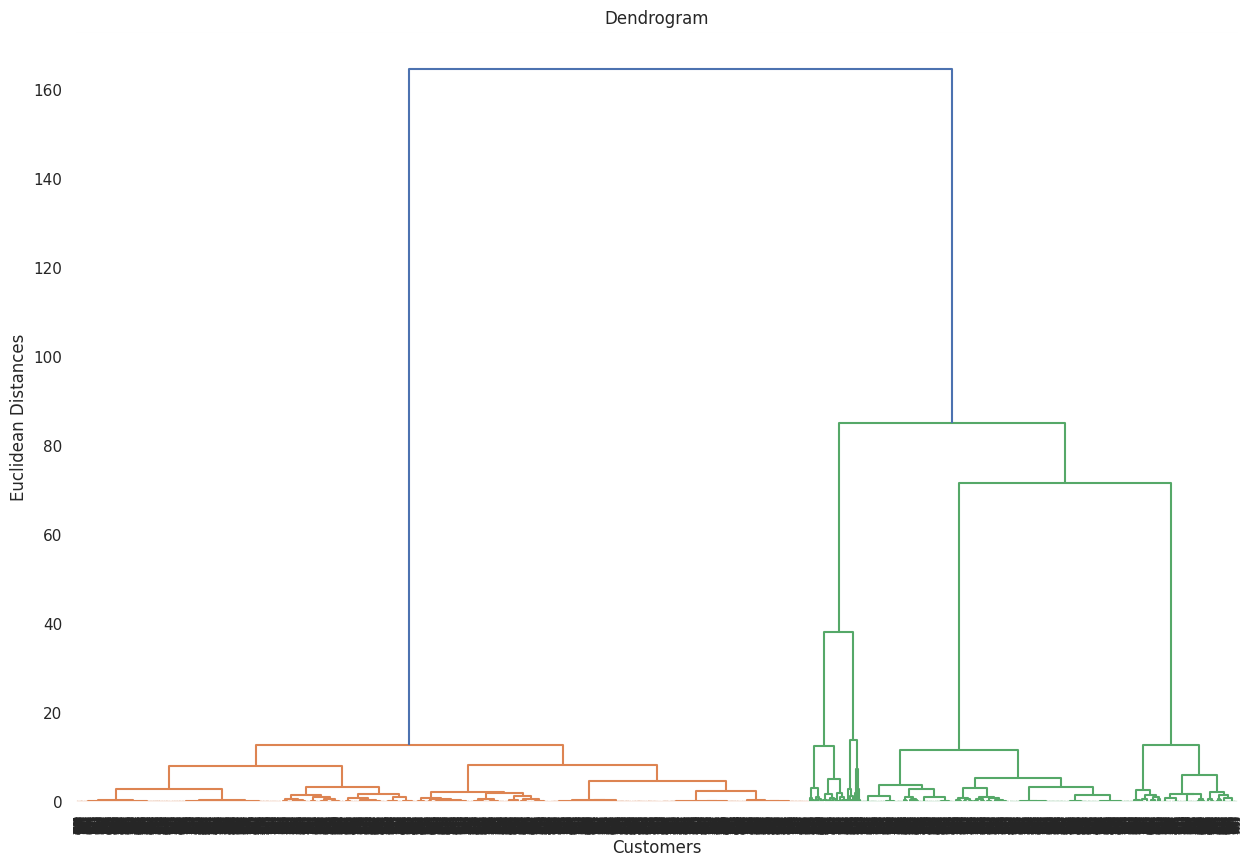

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

##How should we Choose the Number of Clusters in Hierarchical Clustering?
A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

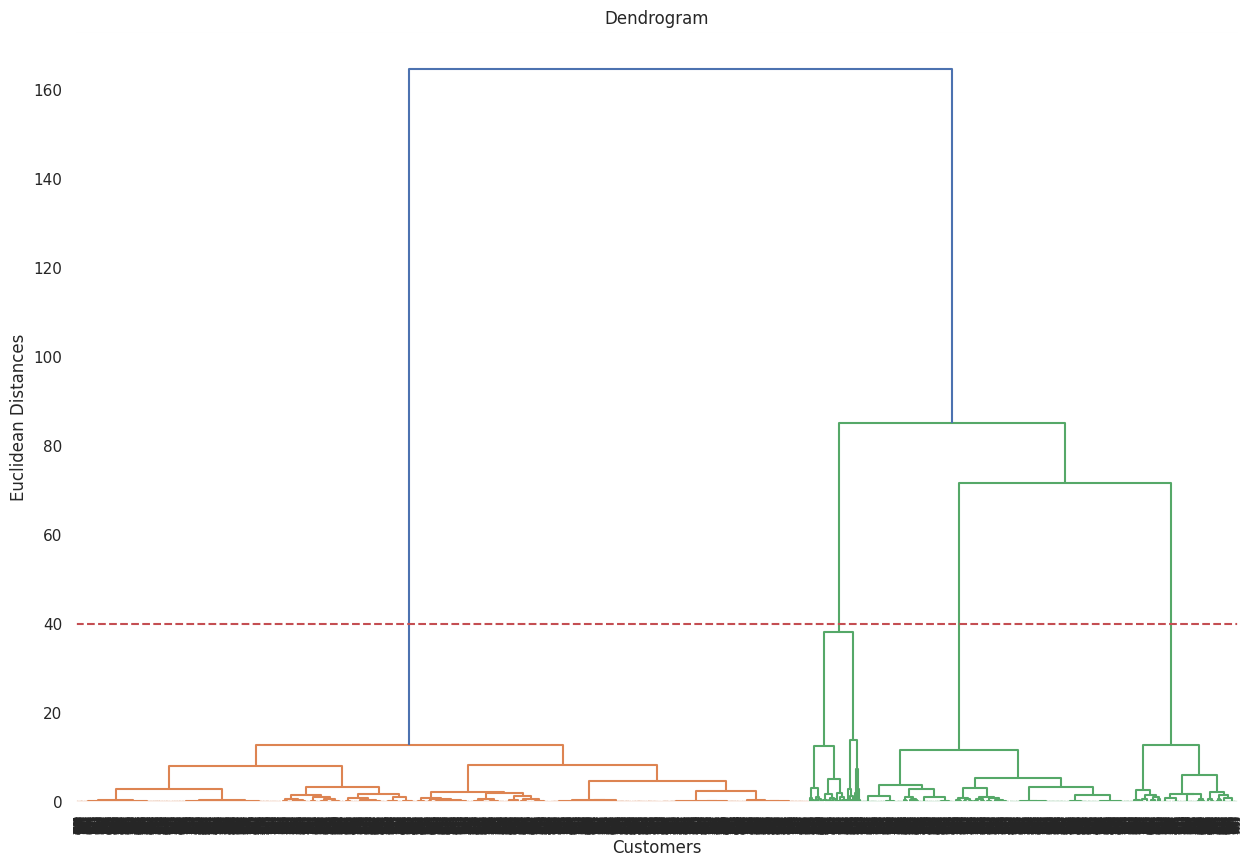

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=40, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

#The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

##No. of Cluster = 4

In [ ]:
# Fitting hierarchical clustering to the DATASET
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hc.labels_



In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]


,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
5483,Movie,Sei,Raj Babu,"Nakhul, Aanchal Munjal, Nassar, Prakash Raj, T...",India,TV-14,"Action & Adventure, Comedies, Dramas",An aspiring yet aimless actor takes over his a...,1
3827,Movie,Luv Shuv Tey Chicken Khurana,Sameer Sharma,"Kunal Kapoor, Huma Qureshi, Rajesh Sharma, Vip...",India,TV-14,"Comedies, International Movies, Romantic Movies",Fleeing London to evade a gangland debt collec...,3
1097,Movie,Brick,Rian Johnson,"Joseph Gordon-Levitt, Nora Zehetner, Lukas Haa...",United States,R,"Independent Movies, Thrillers",Teenage loner Brendan Fry navigates his high s...,2
1556,Movie,Curtiz,Tamas Yvan Topolanszky,"Ferenc Lengyel, Evelin Dobos, Declan Hannigan,...",Hungary,TV-MA,"Dramas, International Movies","Driven and arrogant, film director Michael Cur...",1
1337,Movie,Chillar Party,"Vikas Bahl, Nitesh Tiwari","Irfan Khan, Raju, Sanath Menon, Rohan Grover, ...",India,TV-PG,"Children & Family Movies, Comedies, Dramas",Eight feisty boys befriend young drifter Fatka...,3


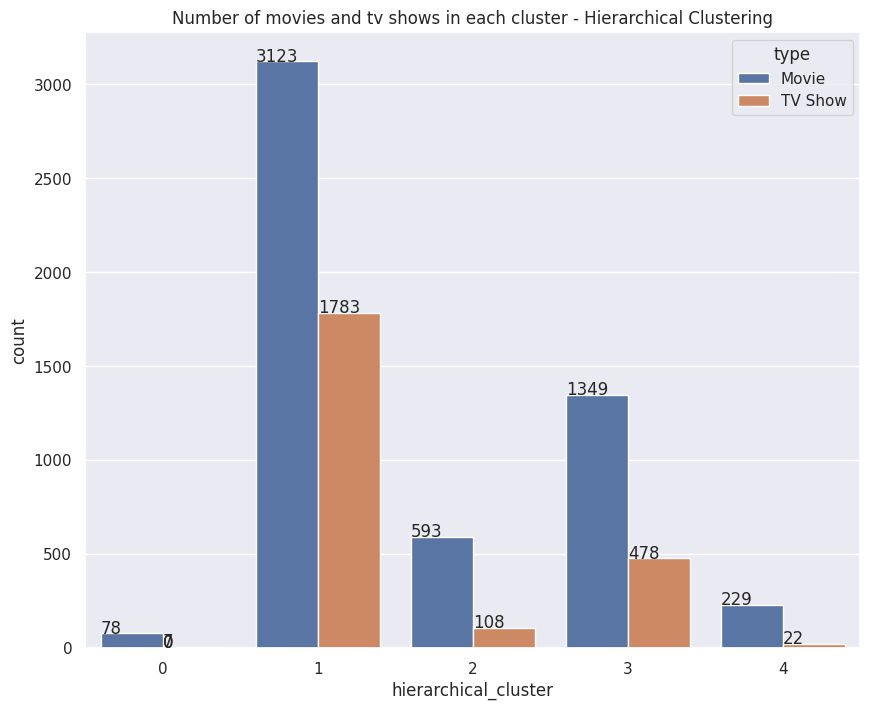

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,8))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))


# Conclusion
In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

*   The dataset contained about 7787 records, and 11 attributes. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
*  It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.
*It was decided to cluster the data based on the attributes: type,director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
*Through TFIDF Vectorization, we created a total of 10000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality.
*We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 5. This was obtained through the elbow method and Silhouette score analysis.
*Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be4 . This was obtained after visualizing the dendrogram.

